In [ ]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from keras.utils import to_categorical
import matplotlib.pyplot as plt

In [ ]:
# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [ ]:
# Preprocess the data
# Changed: Reshape to (samples, height, width, channels)
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

In [ ]:
# Convert labels to categorical
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [ ]:
# Build the model
# Changed: New CNN architecture
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer='adam',  # Changed to 'adam' optimizer
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(train_images, train_labels,
                    epochs=15,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8417 - loss: 0.5501 - val_accuracy: 0.9749 - val_loss: 0.0789
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9757 - loss: 0.0758 - val_accuracy: 0.9833 - val_loss: 0.0543
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9841 - loss: 0.0505 - val_accuracy: 0.9812 - val_loss: 0.0655
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9884 - loss: 0.0378 - val_accuracy: 0.9871 - val_loss: 0.0448
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9921 - loss: 0.0258 - val_accuracy: 0.9866 - val_loss: 0.0458
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9932 - loss: 0.0215 - val_accuracy: 0.9883 - val_loss: 0.0394
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9954 - loss: 0.0145 - val_accuracy: 0.9883 - val_loss: 0.0407
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9955 - loss: 0.0133 - val_accuracy: 0

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9865 - loss: 0.0525
Test accuracy: 0.9893


In [ ]:
# Make predictions on 10 random test images
random_indices = np.random.choice(test_images.shape[0], 10, replace=False)
random_test_images = test_images[random_indices]
random_test_labels = test_labels[random_indices]

predictions = model.predict(random_test_images)
print("Predictions for 10 random test images:")
print(np.argmax(predictions, axis=1))
print("Actual labels:")
print(np.argmax(random_test_labels, axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predictions for 10 random test images:
[3 9 7 2 6 3 6 0 3 6]
Actual labels:
[3 9 7 2 6 3 6 0 3 6]


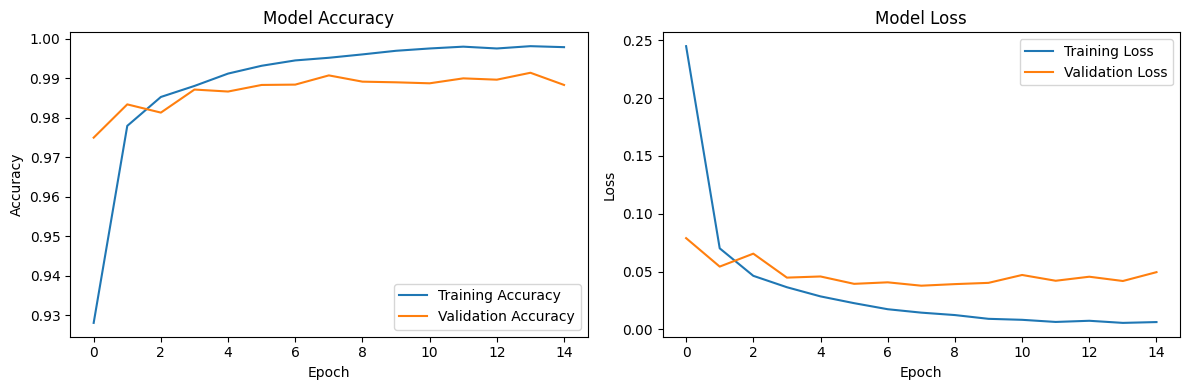

In [ ]:
# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

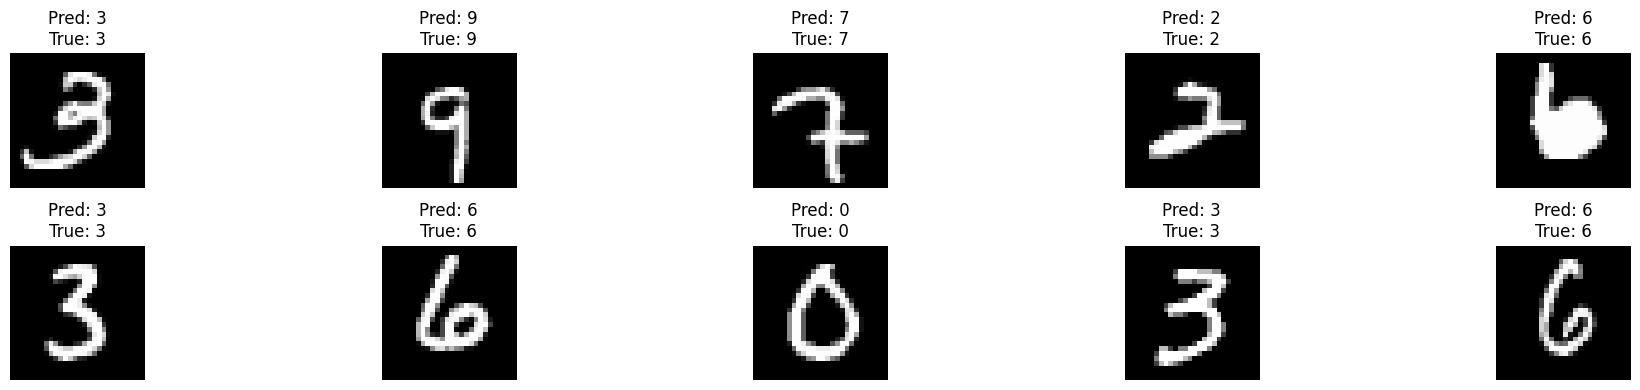

In [ ]:
# Visualize random test images and predictions
plt.figure(figsize=(20, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(random_test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {np.argmax(predictions[i])}\nTrue: {np.argmax(random_test_labels[i])}")
    plt.axis('off')
plt.tight_layout()
plt.show()